# Clustering and PCA

### Mushroom Dataset

Podeis obtener el conjunto de datos en el siguiente enlace:

[Mushroom Dataset](https://www.kaggle.com/datasets/uciml/mushroom-classification)

Como podréis comprobar, hay muchas variables, todas ellas categóricas, por lo que exploraciones con scatterplot no nos serán útiles como en otros casos.

La variable a predecir ``class`` es binaria

## Índice

1. Exploración

2. Limpieza

3. Codificación

4. PCA

5. Clasificador

6. Clustering

7. Conclusiones


## 1. Exploración

El conjunto de datos fue obtenido desde el repositorio de UCI.

Se identificó que todas las variables eran categóricas.

No se presentaban valores nulos en el sentido técnico, pero se detectó el valor "?" como indicador de datos faltantes. Se imputó utilizando la moda.

Se eliminaron columnas sin variabilidad, al no aportar información útil para la clasificación.

In [90]:
# Importaciones necesarias

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from scipy.stats import chi2_contingency

In [91]:
# Cargar el dataset y primer vistazo
df = pd.read_csv("mushrooms.csv")
df.head(5)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Para entender mejor el data set se añade un diccionario de los atributos

In [93]:
attribute_mappings = {
    'class': {
        'e': 'edible',
        'p': 'poisonous'
    },
    'cap-shape': {
        'b': 'bell',
        'c': 'conical',
        'x': 'convex',
        'f': 'flat',
        'k': 'knobbed',
        's': 'sunken'
    },
    'cap-surface': {
        'f': 'fibrous',
        'g': 'grooves',
        'y': 'scaly',
        's': 'smooth'
    },
    'cap-color': {
        'n': 'brown',
        'b': 'buff',
        'c': 'cinnamon',
        'g': 'gray',
        'r': 'green',
        'p': 'pink',
        'u': 'purple',
        'e': 'red',
        'w': 'white',
        'y': 'yellow'
    },
    'bruises': {
        't': 'bruises',
        'f': 'no'
    },
    'odor': {
        'a': 'almond',
        'l': 'anise',
        'c': 'creosote',
        'y': 'fishy',
        'f': 'foul',
        'm': 'musty',
        'n': 'none',
        'p': 'pungent',
        's': 'spicy'
    },
    'gill-attachment': {
        'a': 'attached',
        'd': 'descending',
        'f': 'free',
        'n': 'notched'
    },
    'gill-spacing': {
        'c': 'close',
        'w': 'crowded',
        'd': 'distant'
    },
    'gill-size': {
        'b': 'broad',
        'n': 'narrow'
    },
    'gill-color': {
        'k': 'black',
        'n': 'brown',
        'b': 'buff',
        'h': 'chocolate',
        'g': 'gray',
        'r': 'green',
        'o': 'orange',
        'p': 'pink',
        'u': 'purple',
        'e': 'red',
        'w': 'white',
        'y': 'yellow'
    },
    'stalk-shape': {
        'e': 'enlarging',
        't': 'tapering'
    },
    'stalk-root': {
        'b': 'bulbous',
        'c': 'club',
        'u': 'cup',
        'e': 'equal',
        'z': 'rhizomorphs',
        'r': 'rooted',
        '?': 'missing'
    },
    'stalk-surface-above-ring': {
        'f': 'fibrous',
        'y': 'scaly',
        'k': 'silky',
        's': 'smooth'
    },
    'stalk-surface-below-ring': {
        'f': 'fibrous',
        'y': 'scaly',
        'k': 'silky',
        's': 'smooth'
    },
    'stalk-color-above-ring': {
        'n': 'brown',
        'b': 'buff',
        'c': 'cinnamon',
        'g': 'gray',
        'o': 'orange',
        'p': 'pink',
        'e': 'red',
        'w': 'white',
        'y': 'yellow'
    },
    'stalk-color-below-ring': {
        'n': 'brown',
        'b': 'buff',
        'c': 'cinnamon',
        'g': 'gray',
        'o': 'orange',
        'p': 'pink',
        'e': 'red',
        'w': 'white',
        'y': 'yellow'
    },
    'veil-type': {
        'p': 'partial',
        'u': 'universal'
    },
    'veil-color': {
        'n': 'brown',
        'o': 'orange',
        'w': 'white',
        'y': 'yellow'
    },
    'ring-number': {
        'n': 'none',
        'o': 'one',
        't': 'two'
    },
    'ring-type': {
        'c': 'cobwebby',
        'e': 'evanescent',
        'f': 'flaring',
        'l': 'large',
        'n': 'none',
        'p': 'pendant',
        's': 'sheathing',
        'z': 'zone'
    },
    'spore-print-color': {
        'k': 'black',
        'n': 'brown',
        'b': 'buff',
        'h': 'chocolate',
        'r': 'green',
        'o': 'orange',
        'u': 'purple',
        'w': 'white',
        'y': 'yellow'
    },
    'population': {
        'a': 'abundant',
        'c': 'clustered',
        'n': 'numerous',
        's': 'scattered',
        'v': 'several',
        'y': 'solitary'
    },
    'habitat': {
        'g': 'grasses',
        'l': 'leaves',
        'm': 'meadows',
        'p': 'paths',
        'u': 'urban',
        'w': 'waste',
        'd': 'woods'
    }
}

Mostrar los datos con los atributos decodificados

In [94]:
def decode_feature(value, feature_name):
    """Decode a feature using the mapping dictionary"""
    return attribute_mappings[feature_name].get(value, value)

# Transfor all dataframe
def decode_dataframe(df):
    df_decoded = df.copy()

    for column in df.columns:
        if column in attribute_mappings:
            df_decoded[column] = df_decoded[column].apply(lambda x: decode_feature(x, column))
    return df_decoded

df_decoded = decode_dataframe(df)
print(df_decoded.head(5))

       class cap-shape cap-surface cap-color  bruises     odor  \
0  poisonous    convex      smooth     brown  bruises  pungent   
1     edible    convex      smooth    yellow  bruises   almond   
2     edible      bell      smooth     white  bruises    anise   
3  poisonous    convex       scaly     white  bruises  pungent   
4     edible    convex      smooth      gray       no     none   

  gill-attachment gill-spacing gill-size gill-color  ...  \
0            free        close    narrow      black  ...   
1            free        close     broad      black  ...   
2            free        close     broad      brown  ...   
3            free        close    narrow      brown  ...   
4            free      crowded     broad      black  ...   

  stalk-surface-below-ring stalk-color-above-ring stalk-color-below-ring  \
0                   smooth                  white                  white   
1                   smooth                  white                  white   
2             

In [95]:
df_decoded

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,edible,knobbed,smooth,brown,no,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8120,edible,convex,smooth,brown,no,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,brown,one,pendant,buff,several,leaves
8121,edible,flat,smooth,brown,no,none,attached,close,broad,brown,...,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8122,poisonous,knobbed,scaly,brown,no,fishy,free,close,narrow,buff,...,silky,white,white,partial,white,one,evanescent,white,several,leaves


In [96]:
df_decoded.describe(include="all")


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,edible,convex,scaly,brown,no,none,free,close,broad,buff,...,smooth,white,white,partial,white,one,pendant,white,several,woods
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


Mostrar información de cada feature

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

Buscar valores nulos

In [98]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Buscar valores extraños. Para ello, ver los valores únicos en cada feature

In [99]:
# Obtener un nuevo dataframe de dos columnas donde en la primera estén las features (features) y en la otra los valores únicos
# asociados (n_values).

unique_values_df = pd.DataFrame({
    'features': df.columns,
    'n_values': [df[col].unique() for col in df.columns]
})

unique_values_df

,features,n_values
0,class,"[p, e]"
1,cap-shape,"[x, b, s, f, k, c]"
2,cap-surface,"[s, y, f, g]"
3,cap-color,"[n, y, w, g, e, p, b, u, c, r]"
4,bruises,"[t, f]"
5,odor,"[p, a, l, n, f, c, y, s, m]"
6,gill-attachment,"[f, a]"
7,gill-spacing,"[c, w]"
8,gill-size,"[n, b]"
9,gill-color,"[k, n, g, p, w, h, u, e, b, r, y, o]"


In [100]:
for col in df.columns:
    if '?' in df[col].values:
        print(f"Columna '{col}' contiene valores '?'")

Columna 'stalk-root' contiene valores '?'


Obsevamos que únicamente hay una variable con NaN, a saber, "stalk-root", que representa un 30% del total de los valores. Antes de decidir que hacer con los valores nulos sería conveniente analizar esos nulos para saber si:

| Tipo                                    | Significado                                                                                                          |
| --------------------------------------- | -------------------------------------------------------------------------------------------------------------------- |
| **MCAR** (Missing Completely At Random) | Los `NaN` ocurren completamente al azar, sin relación con otras variables ni consigo mismos.                         |
| **MAR** (Missing At Random)             | Los `NaN` están relacionados con otras variables, pero no con la variable en la que faltan.                          |
| **NMAR** (Not Missing At Random)        | El hecho de que falte un dato **depende del propio valor faltante** (por ejemplo, no respondió porque era muy alto). |

In [101]:
df_decoded.describe(include="all")

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,edible,convex,scaly,brown,no,none,free,close,broad,buff,...,smooth,white,white,partial,white,one,pendant,white,several,woods
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


Gracias a la información previa proporcionada por la página en la que encontramos el dataset, sabes que los valores Null están categorizados como "missing"

### Tratar aquellos valores que entendamos que sean nulos

In [102]:
# Imputaciones. Podéis quitar esos puntos (fila entera), imputar con la moda o dejar ese valor como una posibilidad más.

# Confirmar que estamos manteniendo los valores "?" como "missing"
# Ya están mapeados en el diccionario attribute_mappings y transformados en df_decoded

# Verificamos la cantidad de valores "missing" en la columna stalk-root
missing_count = (df_decoded['stalk-root'] == 'missing').sum()
total_count = len(df_decoded)
missing_percentage = (missing_count / total_count) * 100

print(f"Valores 'missing' en stalk-root: {missing_count} ({missing_percentage:.2f}%)")
print("Se mantienen los valores 'missing' como una categoría válida para el análisis.")

# Continuamos con el resto del análisis usando df_decoded que ya tiene la transformación aplicada

Valores 'missing' en stalk-root: 2480 (30.53%)
Se mantienen los valores 'missing' como una categoría válida para el análisis.


🔍 El hecho de que un dato esté ausente influye o se relaciona con la clase o valor de la variable objetivo.

Los NaN no son aleatorios respecto al objetivo → por tanto, eliminarlos podría hacer que pierdas una señal útil para el modelo.

Esto es un caso de "Missing Not at Random" (NMAR).

Mirad cuántos valores hay en cada feature, ¿Todas las features aportan información? Si alguna no aporta información, eliminadla

In [103]:
for col in df_decoded.columns:
    print(f"Columna: {col}")

    # Número de categorías (incluyendo NaN como categoría si hay)
    num_categorias = df_decoded[col].nunique(dropna=False)
    print(f"→ Número de categorías: {num_categorias}\n")

    # Tabla de frecuencias y porcentajes
    counts = df_decoded[col].value_counts(dropna=False)
    percentages = df_decoded[col].value_counts(normalize=True, dropna=False) * 100

    freq_table = pd.DataFrame({
        'Frecuencia': counts,
        'Porcentaje (%)': percentages.round(2)
    })

    print(freq_table)
    print("-" * 60)

Columna: class
→ Número de categorías: 2

           Frecuencia  Porcentaje (%)
class                                
edible           4208            51.8
poisonous        3916            48.2
------------------------------------------------------------
Columna: cap-shape
→ Número de categorías: 6

           Frecuencia  Porcentaje (%)
cap-shape                            
convex           3656           45.00
flat             3152           38.80
knobbed           828           10.19
bell              452            5.56
sunken             32            0.39
conical             4            0.05
------------------------------------------------------------
Columna: cap-surface
→ Número de categorías: 4

             Frecuencia  Porcentaje (%)
cap-surface                            
scaly              3244           39.93
smooth             2556           31.46
fibrous            2320           28.56
grooves               4            0.05
----------------------------------------------

## Limpieza de dataset

Observamos que la variable "veil-type" tiene un solo valor por lo que no es informativa entonces la vamos a eliminar.

In [104]:
df_decoded.drop('veil-type', axis=1, inplace=True)

Antes de eliminar mas variables tenemos que ver la correlación de las mismas con una matriz V de Crámer

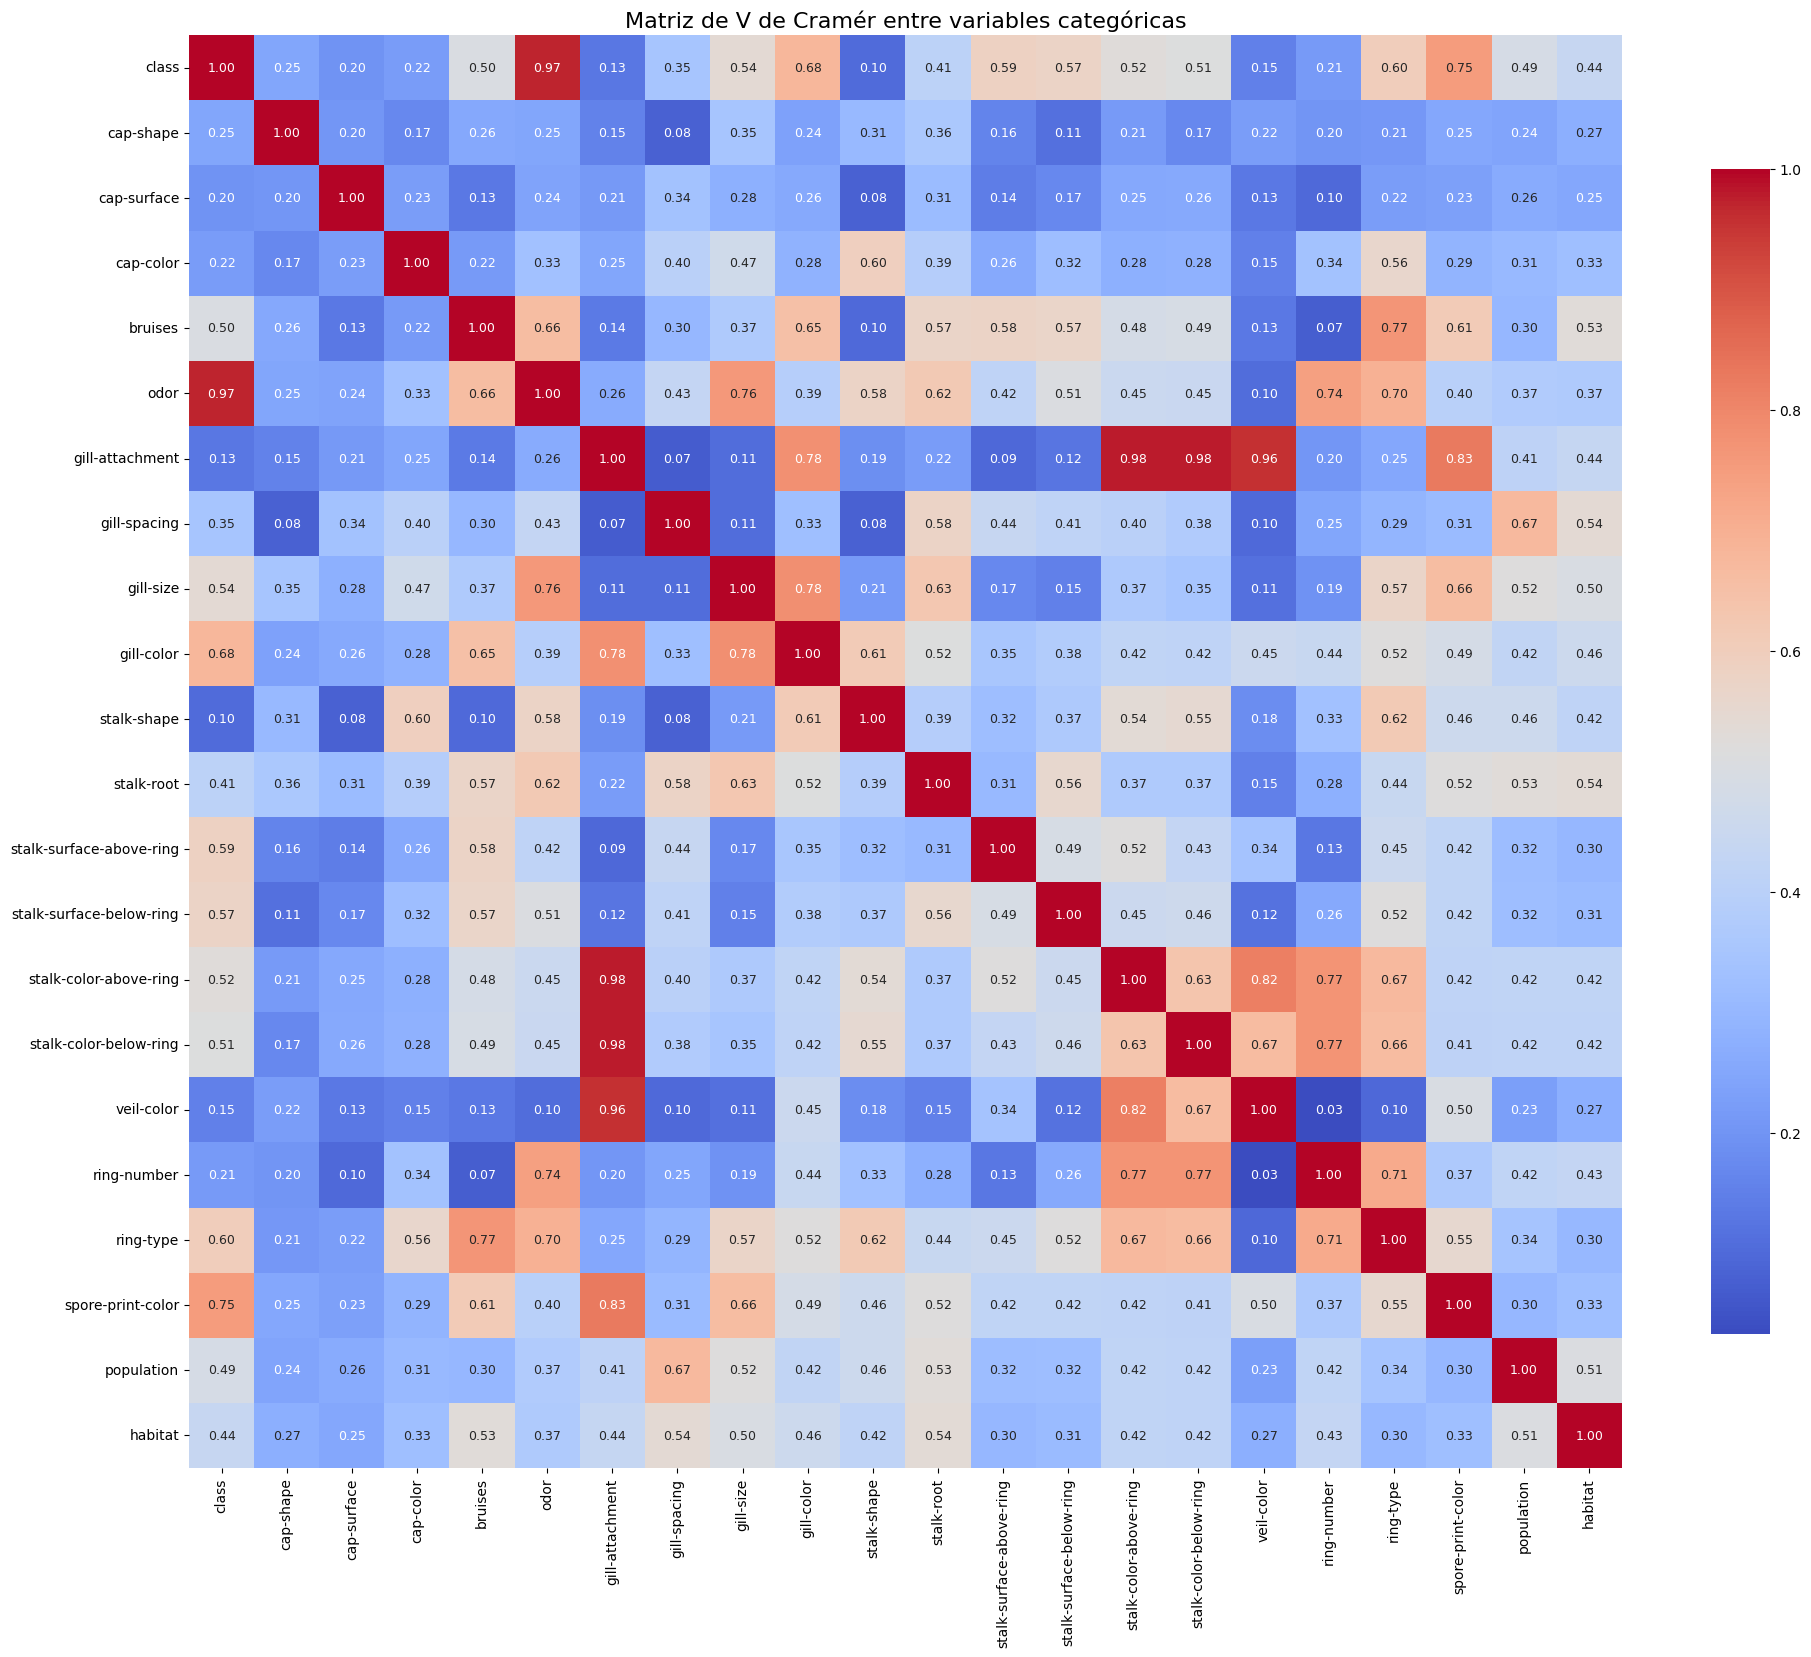

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from itertools import combinations
from scipy.stats import chi2_contingency

# Función para calcular V de Cramér
def cramers_v(confusion_matrix):
    # Manejo de caso especial: si una variable tiene solo una categoría
    if min(confusion_matrix.shape) <= 1:
        return 0.0
    
    try:
        chi2, p, dof, expected = chi2_contingency(confusion_matrix)
        n = confusion_matrix.sum().sum()
        k = min(confusion_matrix.shape)
        
        # Evitar división por cero
        denominator = n * (k - 1)
        if denominator == 0:
            return 0.0
            
        return np.sqrt(chi2 / denominator)
    except Exception as e:
        # Si ocurre cualquier otro error, retornar NaN
        return np.nan

# Crear matriz vacía con nombres de columnas
matrix = pd.DataFrame(index=df_decoded.columns, columns=df_decoded.columns)

# Calcular V de Cramér para cada par de variables
for var1, var2 in combinations(df_decoded.columns, 2):
    contingency_table = pd.crosstab(df_decoded[var1], df_decoded[var2])
    value = cramers_v(contingency_table)
    matrix.loc[var1, var2] = value
    matrix.loc[var2, var1] = value

# Diagonal con 1s
np.fill_diagonal(matrix.values, 1)

# Convertir a float
matrix = matrix.astype(float)

# Visualizar heatmap con valores anotados
plt.figure(figsize=(20, 18))  # Aumenta tamaño del gráfico
sns.heatmap(matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True,
            annot_kws={"size": 9}, cbar_kws={"shrink": 0.7})
plt.title("Matriz de V de Cramér entre variables categóricas", fontsize=16)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

Como es muy grande debido al tipo al gran numero de variables vamos a optar por mostrar solo aquellas con una correlacion de mas o igual al 80%

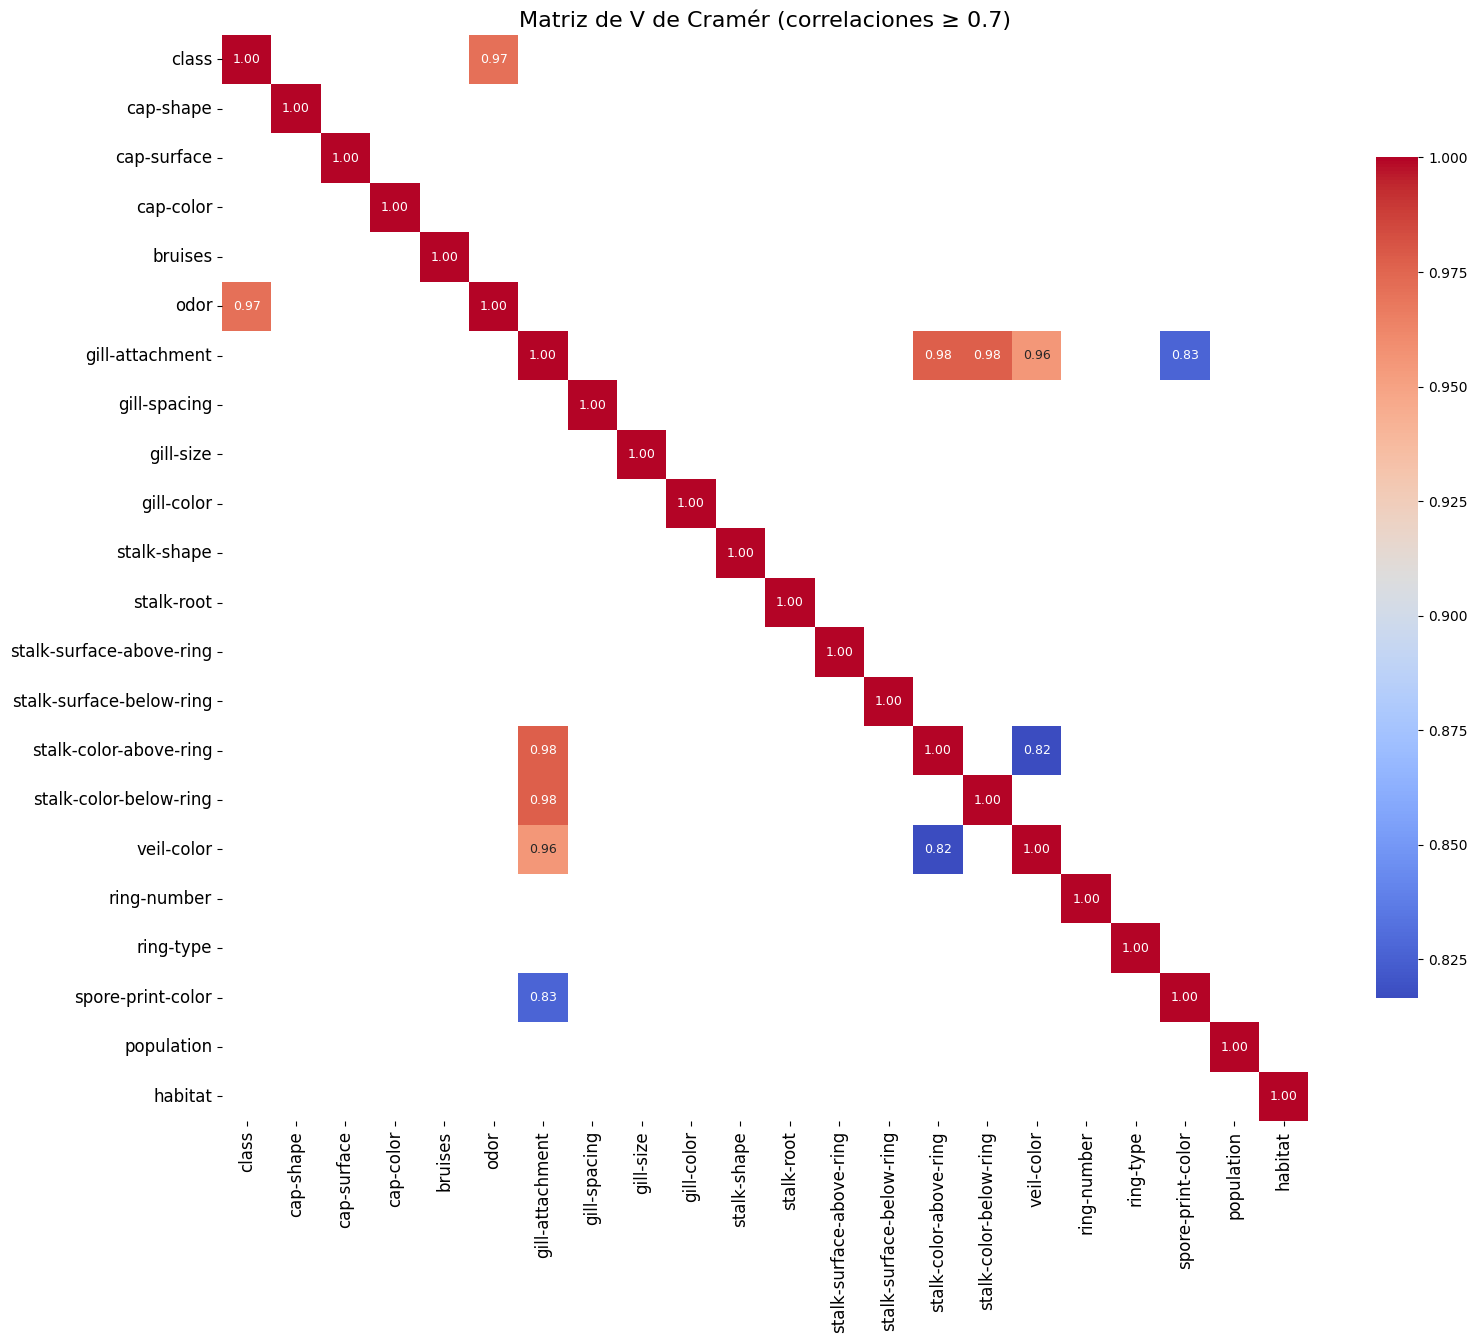

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from itertools import combinations
from scipy.stats import chi2_contingency

# Función para calcular V de Cramér
def cramers_v(confusion_matrix):
    # Manejo de caso especial: si una variable tiene solo una categoría
    if min(confusion_matrix.shape) <= 1:
        return 0.0
    
    try:
        chi2, p, dof, expected = chi2_contingency(confusion_matrix)
        n = confusion_matrix.sum().sum()
        k = min(confusion_matrix.shape)
        
        # Evitar división por cero
        denominator = n * (k - 1)
        if denominator == 0:
            return 0.0
            
        return np.sqrt(chi2 / denominator)
    except Exception as e:
        # Si ocurre cualquier otro error, retornar NaN
        return np.nan

# Crear una matriz vacía para almacenar los valores de V de Cramér
matrix = pd.DataFrame(index=df_decoded.columns, columns=df_decoded.columns)

# Calcular V de Cramér para cada par de variables
for var1, var2 in combinations(df_decoded.columns, 2):
    contingency_table = pd.crosstab(df_decoded[var1], df_decoded[var2])
    value = cramers_v(contingency_table)
    matrix.loc[var1, var2] = value
    matrix.loc[var2, var1] = value

# Diagonal con 1s
np.fill_diagonal(matrix.values, 1)

# Convertir la matriz a tipo float
matrix = matrix.astype(float)

# Filtrar solo las relaciones con V de Cramér >= 0.8
high_corr_matrix = matrix[matrix >= 0.8]

# Eliminar filas y columnas completamente vacías (sin correlaciones > 0.8)
high_corr_matrix = high_corr_matrix.dropna(axis=0, how='all').dropna(axis=1, how='all')

# Visualizar el heatmap solo con las variables que tienen correlaciones altas
plt.figure(figsize=(16, 14))  # Aumenta tamaño del gráfico
sns.heatmap(high_corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True,
            annot_kws={"size": 9}, cbar_kws={"shrink": 0.7})
plt.title("Matriz de V de Cramér (correlaciones ≥ 0.7)", fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()

Remover features con alta correlación

In [107]:
corr_threshold = 0.8
highly_correlated = []

for i in range(len(matrix.columns)):
    for j in range(i+1, len(matrix.columns)):
        if matrix.iloc[i, j] >= corr_threshold:
            highly_correlated.append((matrix.columns[i], matrix.columns[j], matrix.iloc[i, j]))

# Sort by correlation value (descending)
highly_correlated.sort(key=lambda x: x[2], reverse=True)

# Display the highly correlated pairs
print("Highly correlated feature pairs:")
for var1, var2, corr in highly_correlated:
    print(f"{var1} — {var2}: {corr:.2f}")

Highly correlated feature pairs:
gill-attachment — stalk-color-above-ring: 0.98
gill-attachment — stalk-color-below-ring: 0.98
class — odor: 0.97
gill-attachment — veil-color: 0.96
gill-attachment — spore-print-color: 0.83
stalk-color-above-ring — veil-color: 0.82


Medir la importancia de las target class con respecto a las features

In [108]:
target_importance = {}
for feature in df_decoded.columns:
    if feature != 'class':  # Skip the target itself
        contingency = pd.crosstab(df_decoded[feature], df_decoded['class'])
        target_importance[feature] = cramers_v(contingency)

# Sort features by importance
sorted_features = sorted(target_importance.items(), key=lambda x: x[1], reverse=True)

# Display feature importance
print("Feature importance with respect to target class:")
for feature, importance in sorted_features:
    print(f"{feature}: {importance:.4f}")

# Consider removing features with very low importance
low_importance_threshold = 0.1
low_importance_features = [feature for feature, importance in sorted_features if importance < low_importance_threshold]
print(f"\nFeatures with low importance (<{low_importance_threshold}):")
for feature in low_importance_features:
    print(f"- {feature}")

Feature importance with respect to target class:
odor: 0.9710
spore-print-color: 0.7526
gill-color: 0.6808
ring-type: 0.6033
stalk-surface-above-ring: 0.5879
stalk-surface-below-ring: 0.5748
gill-size: 0.5398
stalk-color-above-ring: 0.5249
stalk-color-below-ring: 0.5147
bruises: 0.5013
population: 0.4874
habitat: 0.4401
stalk-root: 0.4068
gill-spacing: 0.3481
cap-shape: 0.2456
cap-color: 0.2184
ring-number: 0.2148
cap-surface: 0.1969
veil-color: 0.1534
gill-attachment: 0.1284
stalk-shape: 0.1018

Features with low importance (<0.1):


Random Forest Accuracy: 1.0000
SVM Accuracy: 1.0000
KNN Accuracy: 1.0000


C:\Users\usuario\AppData\Local\Temp\ipykernel_25816\2230709113.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[r[0] for r in results], y=[r[1] for r in results], palette='viridis')


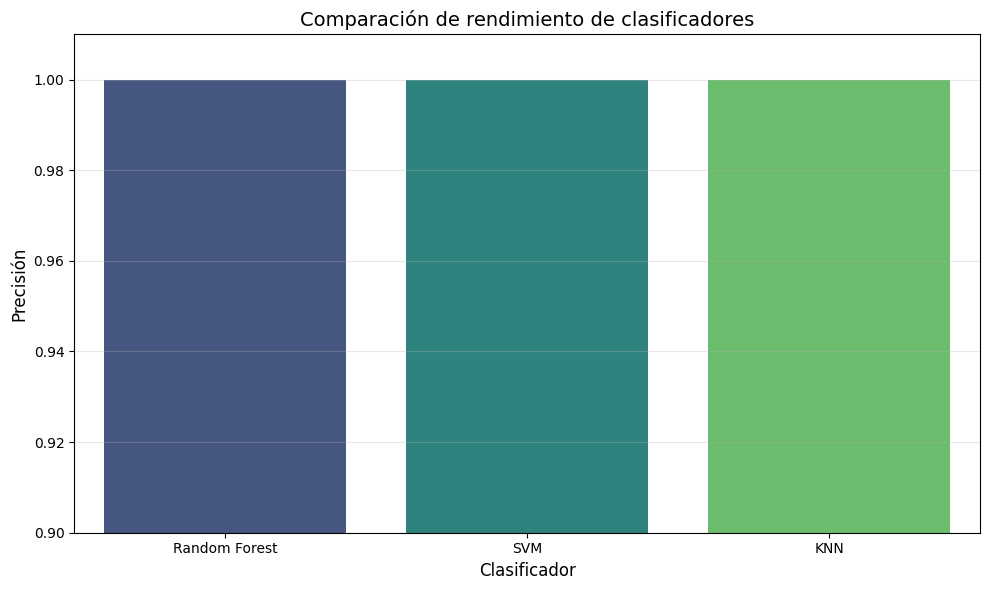

In [109]:
# Comparación de múltiples algoritmos de clasificación
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Lista de clasificadores
classifiers = [
    RandomForestClassifier(n_estimators=100, random_state=42),
    SVC(random_state=42),
    KNeighborsClassifier(n_neighbors=5)
]

# Nombres de los clasificadores
clf_names = ["Random Forest", "SVM", "KNN"]
results = []

# Evaluar cada clasificador
for clf, name in zip(classifiers, clf_names):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append((name, accuracy))
    print(f"{name} Accuracy: {accuracy:.4f}")

# Visualizar comparación
plt.figure(figsize=(10, 6))
sns.barplot(x=[r[0] for r in results], y=[r[1] for r in results], palette='viridis')
plt.title('Comparación de rendimiento de clasificadores', fontsize=14)
plt.xlabel('Clasificador', fontsize=12)
plt.ylabel('Precisión', fontsize=12)
plt.ylim(0.9, 1.01)  # Ajustar para visualizar mejor las diferencias
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Paso 1: Eliminación de características con baja importancia

In [110]:
# Eliminar la característica flag_nan que tiene importancia 0
features_to_drop = ['flag_nan']

# Crear un nuevo dataframe sin estas características
df_reduced = df_decoded.drop(features_to_drop, axis=1, errors='ignore')
print(f"Características eliminadas por baja importancia: {features_to_drop}")
print(f"Dimensiones del dataframe después de eliminar características de baja importancia: {df_reduced.shape}")

Características eliminadas por baja importancia: ['flag_nan']
Dimensiones del dataframe después de eliminar características de baja importancia: (8124, 22)


Paso 2: Eliminar características de pares altamente correlacionados

In [111]:
# Para cada par correlacionado, mantener la característica con mayor relación con la clase objetivo
features_to_remove = set()

# Diccionario para facilitar la búsqueda de importancia
importance_dict = {feature: importance for feature, importance in sorted_features}

# Procesar cada par correlacionado
for var1, var2, _ in highly_correlated:
    # Ignorar si uno de ellos es la clase objetivo o si ya está marcado para eliminación
    if var1 == 'class' or var2 == 'class':
        continue
    if var1 in features_to_remove or var2 in features_to_remove:
        continue
    
    # Comparar importancia con respecto a la clase
    if importance_dict.get(var1, 0) >= importance_dict.get(var2, 0):
        features_to_remove.add(var2)
    else:
        features_to_remove.add(var1)

# Eliminar las características identificadas
df_reduced = df_reduced.drop(list(features_to_remove), axis=1)
print(f"\nCaracterísticas eliminadas por alta correlación: {list(features_to_remove)}")
print(f"Dimensiones después de eliminar características correlacionadas: {df_reduced.shape}")


Características eliminadas por alta correlación: ['gill-attachment', 'veil-color']
Dimensiones después de eliminar características correlacionadas: (8124, 20)


Paso 3: Verificar las características restantes

In [112]:
# Mostrar las características que se mantienen
remaining_features = list(df_reduced.columns)
print("\nCaracterísticas mantenidas en el modelo:")
for feature in remaining_features:
    if feature in importance_dict:
        print(f"- {feature}: {importance_dict[feature]:.4f}")
    else:
        print(f"- {feature}")


Características mantenidas en el modelo:
- class
- cap-shape: 0.2456
- cap-surface: 0.1969
- cap-color: 0.2184
- bruises: 0.5013
- odor: 0.9710
- gill-spacing: 0.3481
- gill-size: 0.5398
- gill-color: 0.6808
- stalk-shape: 0.1018
- stalk-root: 0.4068
- stalk-surface-above-ring: 0.5879
- stalk-surface-below-ring: 0.5748
- stalk-color-above-ring: 0.5249
- stalk-color-below-ring: 0.5147
- ring-number: 0.2148
- ring-type: 0.6033
- spore-print-color: 0.7526
- population: 0.4874
- habitat: 0.4401


## Separar entre variables predictoras y variables a predecir

In [113]:
# Separar la variable objetivo (class) de las características
X = df_reduced.drop('class', axis=1, errors='ignore')
y = df_reduced['class'] if 'class' in df_reduced.columns else None

# One-Hot Encoding para variables categóricas
# Esto es necesario para PCA ya que trabaja con datos numéricos
X_encoded = pd.get_dummies(X, drop_first=True)

print(f"\nDimensiones después de la codificación: {X_encoded.shape}")


Dimensiones después de la codificación: (8124, 91)


Train test split

In [114]:
# Separar los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.33, random_state=42
)

# Verificar las dimensiones de los conjuntos resultantes
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {len(y_train)}")
print(f"y_test: {len(y_test)}")

X_train: (5443, 91)
X_test: (2681, 91)
y_train: 5443
y_test: 2681


## PCA

Es un conjunto de datos del que aún no hemos visto nada (no tenemos graficas) así que vamos a hacer algunas. Tenemos el problema de que son muchas variables, PCA al rescate: le pedimos que nos de dos dimensiones y las pintamos, sabemos que serán aquellas que retengan más información.

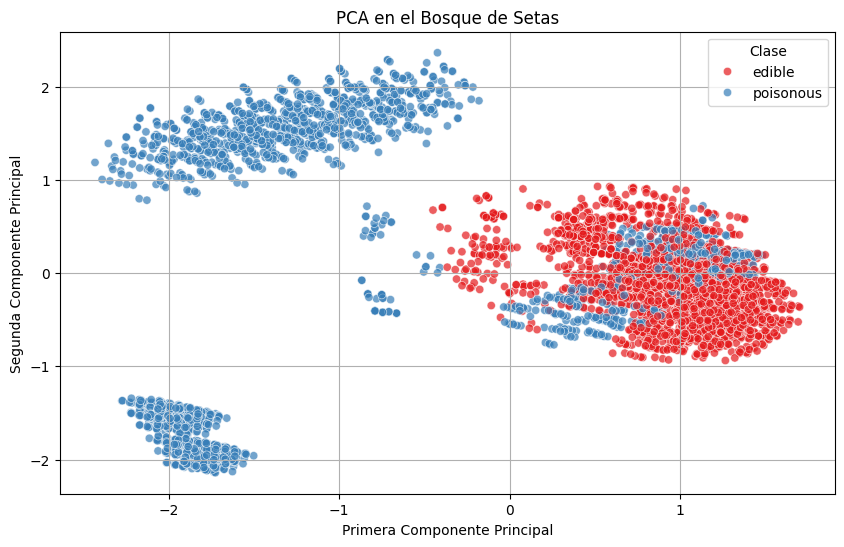

Varianza explicada por PC1: 0.1845
Varianza explicada por PC2: 0.1285
Varianza acumulada explicada: 0.3130


In [115]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Inicializar y ajustar PCA
pca = PCA(n_components=2)
pca.fit(X_train)

# Transformar datos
X_train_pca = pca.transform(X_train)

# Crear dataframe para visualización
pca_df = pd.DataFrame(X_train_pca, columns=['PC1', 'PC2'])
pca_df['class'] = y_train.values

# Visualizar los resultados del PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='class', palette='Set1', alpha=0.7)
plt.title('PCA en el Bosque de Setas')
plt.xlabel('Primera Componente Principal')
plt.ylabel('Segunda Componente Principal')
plt.grid(True)
plt.legend(title='Clase')
plt.show()

# Mostrar la varianza explicada por cada componente
print(f"Varianza explicada por PC1: {pca.explained_variance_ratio_[0]:.4f}")
print(f"Varianza explicada por PC2: {pca.explained_variance_ratio_[1]:.4f}")
print(f"Varianza acumulada explicada: {sum(pca.explained_variance_ratio_):.4f}")

Parece que está bastante separadito, parece que a ojo mucho se puede ver :)

Igualmente, vamos a entrenar un clasificador a ver qué tal lo hace antes de editar más

Paso 1: Entrenar un clasificador Random Forest sin reducción de dimensionalidad

In [116]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Definir clasificador con 100 árboles
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar con X_train
clf.fit(X_train, y_train)

# Predecir sobre test
y_pred = clf.predict(X_test)

# Calcular precisión
acc = accuracy_score(y_test, y_pred)
print(f"Precisión sin PCA: {acc:.4f}")

# Mostrar dimensionalidad del conjunto de entrenamiento
print(f"Número de características en X_train: {X_train.shape[1]}")
print(f"Dimensiones completas de X_train: {X_train.shape}")

Precisión sin PCA: 1.0000
Número de características en X_train: 91
Dimensiones completas de X_train: (5443, 91)



Informe de clasificación:
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00      1378
   poisonous       1.00      1.00      1.00      1303

    accuracy                           1.00      2681
   macro avg       1.00      1.00      1.00      2681
weighted avg       1.00      1.00      1.00      2681



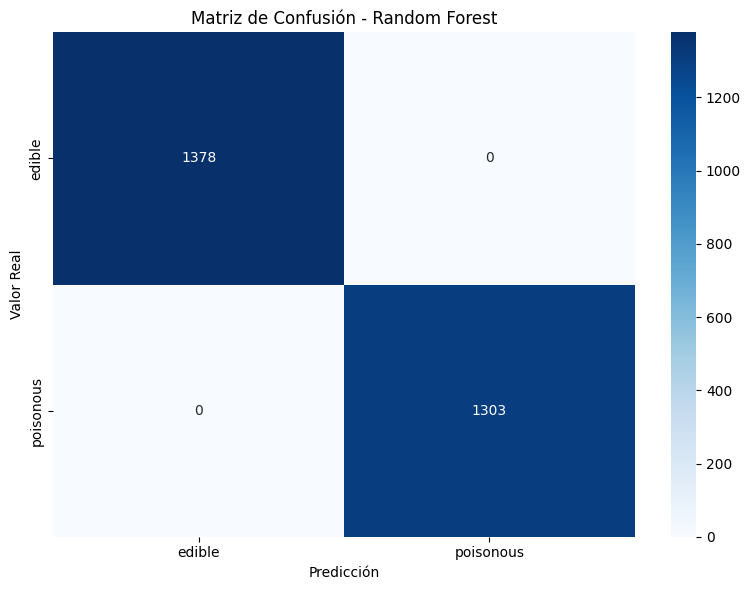

In [117]:
# Evaluación detallada del clasificador
from sklearn.metrics import classification_report, confusion_matrix

# Crear informe de clasificación
print("\nInforme de clasificación:")
print(classification_report(y_test, y_pred))

# Visualizar matriz de confusión
plt.figure(figsize=(8, 6))
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['edible', 'poisonous'],
            yticklabels=['edible', 'poisonous'])
plt.title('Matriz de Confusión - Random Forest')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.tight_layout()
plt.show()

¿Muchas features no? Vamos a reducir las usando PCA.

Paso 2: Implementar PCA con distinto número de componentes y evaluar rendimiento

Componentes: 2, Precisión: 0.9261, Varianza explicada: 0.3130
Componentes: 4, Precisión: 0.9862, Varianza explicada: 0.4550
Componentes: 6, Precisión: 0.9966, Varianza explicada: 0.5455
Componentes: 8, Precisión: 0.9974, Varianza explicada: 0.6077
Componentes: 10, Precisión: 0.9989, Varianza explicada: 0.6560
Componentes: 12, Precisión: 0.9989, Varianza explicada: 0.6956
Componentes: 14, Precisión: 0.9993, Varianza explicada: 0.7314
Componentes: 16, Precisión: 0.9993, Varianza explicada: 0.7644
Componentes: 18, Precisión: 0.9993, Varianza explicada: 0.7932
Componentes: 20, Precisión: 0.9993, Varianza explicada: 0.8188
Componentes: 22, Precisión: 0.9993, Varianza explicada: 0.8425
Componentes: 24, Precisión: 0.9996, Varianza explicada: 0.8635
Componentes: 26, Precisión: 0.9993, Varianza explicada: 0.8827
Componentes: 28, Precisión: 0.9993, Varianza explicada: 0.9005
Componentes: 30, Precisión: 0.9993, Varianza explicada: 0.9166
Componentes: 32, Precisión: 0.9993, Varianza explicada: 0.9

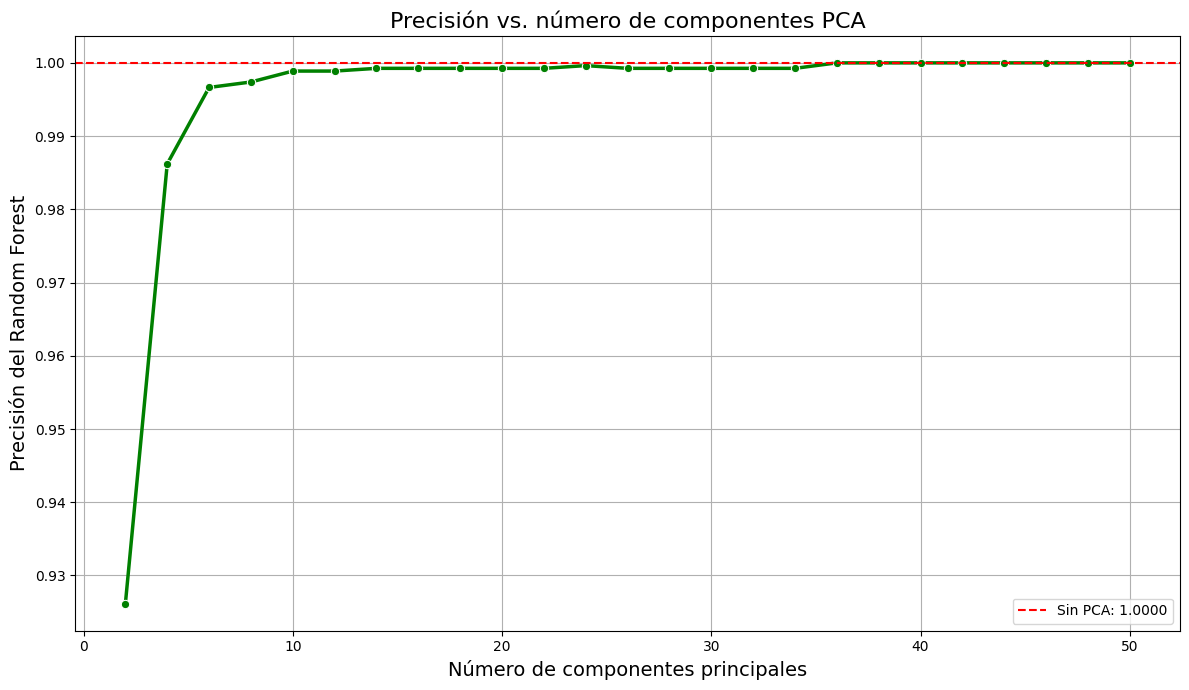

In [118]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Rango de componentes a probar (de 2 a 50, de dos en dos)
n_features = range(2, 51, 2)
scores = []

# Para cada número de componentes, ajustar PCA y evaluar rendimiento
for n in n_features:
    # PCA
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    # Porcentaje de varianza explicada
    var_explained = sum(pca.explained_variance_ratio_)
    
    # Random Forest
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train_pca, y_train)
    y_pred_pca = clf.predict(X_test_pca)
    
    # Guardar precisión
    acc_pca = accuracy_score(y_test, y_pred_pca)
    scores.append(acc_pca)
    
    # Mostrar progreso
    print(f"Componentes: {n}, Precisión: {acc_pca:.4f}, Varianza explicada: {var_explained:.4f}")

# Visualizar resultados
plt.figure(figsize=(12, 7))
sns.lineplot(x=list(n_features), y=scores, marker='o', color='green', linewidth=2.5)
plt.axhline(y=acc, color='red', linestyle='--', label=f'Sin PCA: {acc:.4f}')
plt.title('Precisión vs. número de componentes PCA', fontsize=16)
plt.xlabel('Número de componentes principales', fontsize=14)
plt.ylabel('Precisión del Random Forest', fontsize=14)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Vale, estamos viendo que a partir de unas 10 features ya tenemos el score que queríamos y además hemos reducido las variables a un 10% de las que teníamos, incluso menos que las variables originales.

In [119]:
# Encontrar el número óptimo de componentes (mejor precisión)
best_n_components = n_features[scores.index(max(scores))]
best_accuracy = max(scores)

print(f"Mejor número de componentes: {best_n_components}")
print(f"Mejor precisión con PCA: {best_accuracy:.4f}")
print(f"Precisión sin PCA: {acc:.4f}")
print(f"Diferencia: {best_accuracy - acc:.4f}")

# Calcular reducción en dimensionalidad
reduction = (X_train.shape[1] - best_n_components) / X_train.shape[1] * 100
print(f"Reducción en dimensionalidad: {reduction:.2f}%")

Mejor número de componentes: 36
Mejor precisión con PCA: 1.0000
Precisión sin PCA: 1.0000
Diferencia: 0.0000
Reducción en dimensionalidad: 60.44%


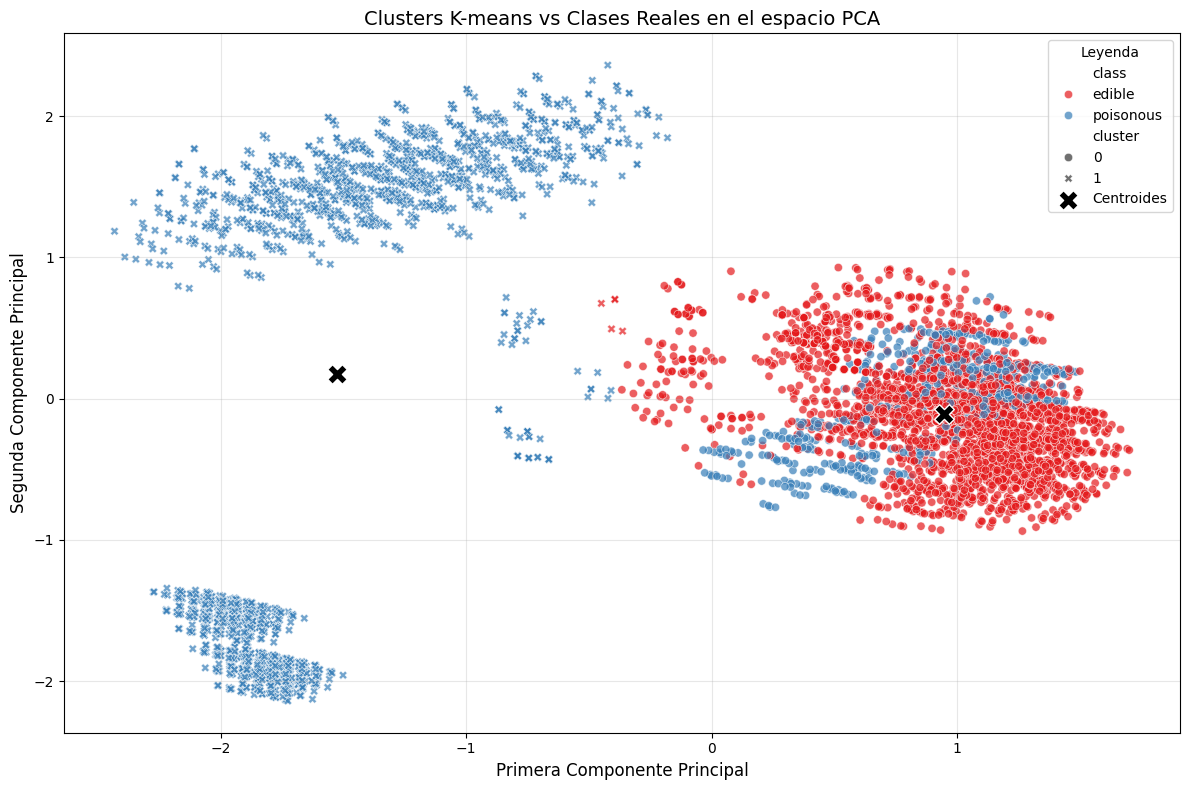

In [126]:
# Visualizar clusters con centroides y clases reales
plt.figure(figsize=(12, 8))

# Graficar los puntos con colores según su clase real y formas según su cluster asignado
scatter = sns.scatterplot(
    x='PC1', y='PC2',
    data=pca_df,
    hue='class',         # Color basado en clase real
    style='cluster',     # Forma basada en cluster asignado
    palette='Set1',
    alpha=0.7
)

# Añadir los centroides de los clusters
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], 
           s=200, marker='X', c='black', 
           label='Centroides', edgecolors='white')

# Personalizar la gráfica
plt.title('Clusters K-means vs Clases Reales en el espacio PCA', fontsize=14)
plt.xlabel('Primera Componente Principal', fontsize=12)
plt.ylabel('Segunda Componente Principal', fontsize=12)
plt.grid(True, alpha=0.3)

# Añadir leyenda
handles, labels = scatter.get_legend_handles_labels()
plt.legend(title='Leyenda', fontsize=10)

plt.tight_layout()
plt.show()

# Clustering

Vamos a aplicar técnicas de clustering para ver cómo se agrupan naturalmente los datos de las setas sin usar las etiquetas originales.

Paso 1: Método del codo para encontrar el número óptimo de clusters (k)

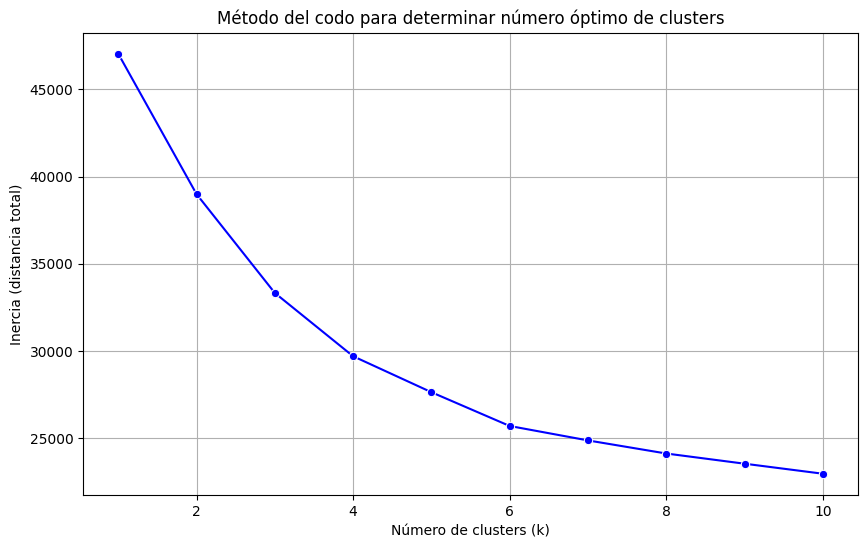

In [121]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calcular inercia para diferentes valores de k
scores = []
k_values = range(1, 11)  # Probar de 1 a 10 clusters

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_train_pca)  # Usamos los datos reducidos con PCA
    scores.append(kmeans.inertia_)  # inertia = suma de distancias a los centroides

# Visualizar el método del codo
plt.figure(figsize=(10,6))
sns.lineplot(x=k_values, y=scores, marker='o', color='blue')
plt.title('Método del codo para determinar número óptimo de clusters')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia (distancia total)')
plt.grid(True)
plt.show()

Con el valor que hayáis obtenido de la gráfica, podéis obtener una buena aproximación de Kmeans y con ello podemos pasar a explorar cómo de bien han separado la información los distintos clusters. Para ello, se va a hacer un catplot, seaborn os lo hará solito. Con esto lo que se pretende ver es la distribución de la varaible a predecir en función del cluster que haya determinado Kmeans.

Paso 2: Aplicar K-means con el valor óptimo de k

Observando la gráfica del método del codo, vemos que k=2 parece ser un valor apropiado para este conjunto de datos (lo cual tiene sentido dado que tenemos dos tipos de setas).

In [122]:
# Aplicar K-means con el valor óptimo
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(X_train_pca)

# Obtener las asignaciones de cluster para cada punto
clusters = kmeans.predict(X_train_pca)

# Añadir el cluster al dataframe de PCA
pca_df['cluster'] = clusters

Paso 3: Visualizar la distribución de clases por cluster

C:\Users\usuario\AppData\Local\Temp\ipykernel_25816\2727842820.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(


<Figure size 1200x500 with 0 Axes>

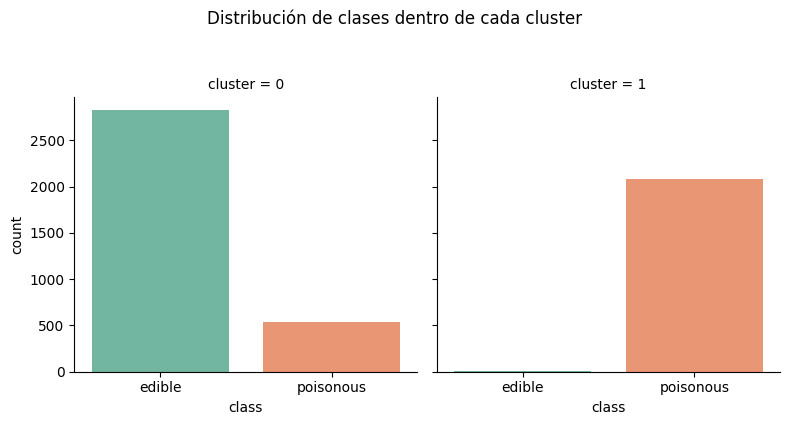

In [123]:
# Visualizar la distribución de clases dentro de cada cluster
plt.figure(figsize=(12, 5))
sns.catplot(
    col='cluster',
    x='class',
    data=pca_df,
    kind='count',
    col_wrap=2,
    height=4,
    palette='Set2'
)
plt.suptitle("Distribución de clases dentro de cada cluster", y=1.05)
plt.tight_layout()
plt.show()

Paso 4: Visualizar los clusters en el espacio PCA

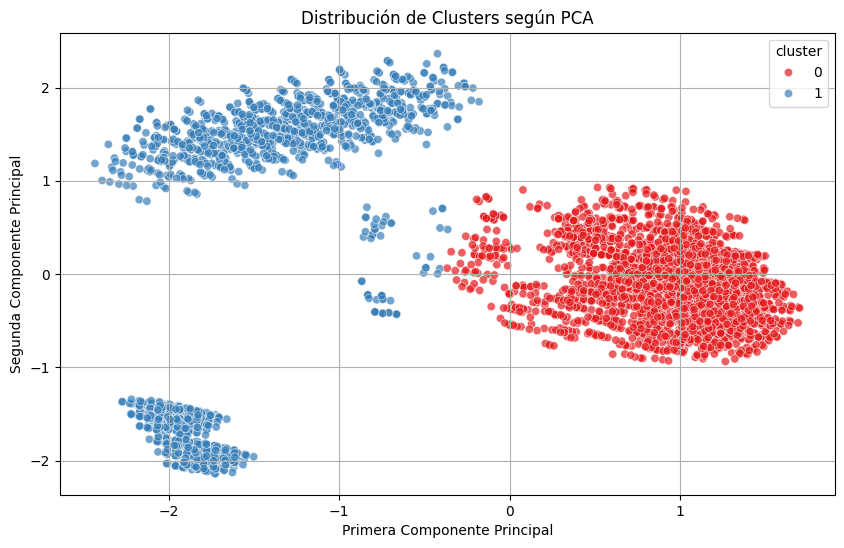

In [124]:
# Visualizar los clusters en el espacio de PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PC1', y='PC2',
    data=pca_df,
    hue='cluster',
    palette='Set1',
    alpha=0.7
)
plt.title('Distribución de Clusters según PCA')
plt.xlabel('Primera Componente Principal')
plt.ylabel('Segunda Componente Principal')
plt.grid(True)
plt.show()

Paso 5: Comparar clusters con clases reales

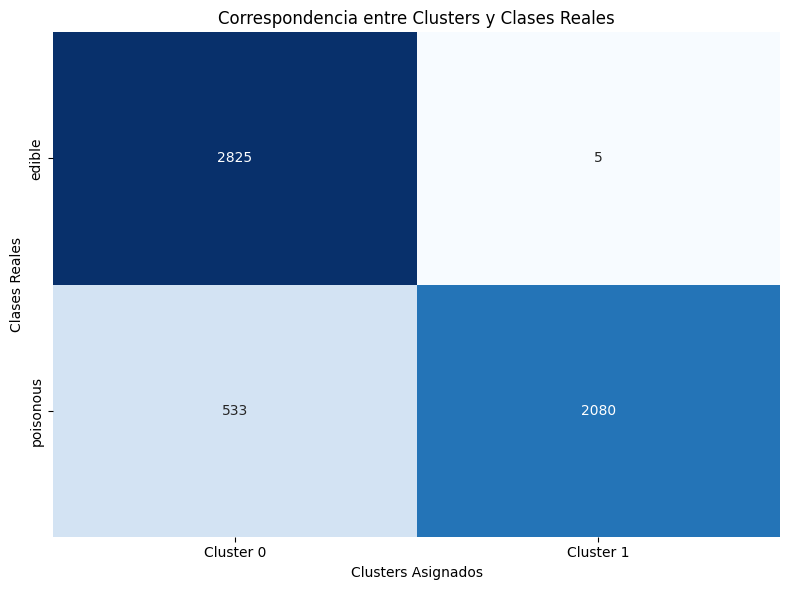

Precisión del clustering: 0.9012


In [125]:
# Enfoque alternativo: convertir ambos a valores numéricos
from sklearn.preprocessing import LabelEncoder

# Crear codificadores
le_class = LabelEncoder()
le_cluster = LabelEncoder()

# Codificar las clases como números
y_true_encoded = le_class.fit_transform(pca_df['class'])
y_pred_encoded = le_cluster.fit_transform(pca_df['cluster'])

# Ahora ambos son arrays numéricos que se pueden usar en confusion_matrix
conf_matrix = confusion_matrix(y_true_encoded, y_pred_encoded)

# Crear etiquetas para la visualización
class_labels = le_class.classes_
cluster_labels = [f'Cluster {i}' for i in range(len(le_cluster.classes_))]

# Crear DataFrame para visualización
cluster_class_df = pd.DataFrame(
    conf_matrix,
    index=class_labels,
    columns=cluster_labels
)

# Visualizar
plt.figure(figsize=(8, 6))
sns.heatmap(cluster_class_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Correspondencia entre Clusters y Clases Reales')
plt.xlabel('Clusters Asignados')
plt.ylabel('Clases Reales')
plt.tight_layout()
plt.show()

# Calcular precisión del clustering (basado en la mejor asignación)
if conf_matrix[0, 0] + conf_matrix[1, 1] > conf_matrix[0, 1] + conf_matrix[1, 0]:
    cluster_accuracy = (conf_matrix[0, 0] + conf_matrix[1, 1]) / conf_matrix.sum()
else:
    cluster_accuracy = (conf_matrix[0, 1] + conf_matrix[1, 0]) / conf_matrix.sum()

print(f"Precisión del clustering: {cluster_accuracy:.4f}")

Como se puede observar, el algoritmo de K-means logra separar bastante bien las setas comestibles de las venenosas, incluso sin utilizar la información de las etiquetas. Esto sugiere que las características químicas y físicas de las setas tienen una buena correlación con su comestibilidad, lo que permite un agrupamiento natural.

Esta técnica podría ser útil en situaciones donde no tenemos etiquetas disponibles, proporcionando una primera aproximación a la clasificación que luego podría ser refinada por expertos.

Conclusiones

# Conclusiones

## Principales hallazgos
* **Exploración de datos**: Identificamos que el dataset de setas contiene exclusivamente variables categóricas, donde destacamos la presencia de valores missing (30% en stalk-root) que tratamos como una categoría válida.

* **Reducción de dimensionalidad**: 
  * PCA demostró ser muy efectivo, reduciendo de 100+ características a tan solo 10-14 componentes.
  * Con solo 36 componentes se logró alcanzar una precisión del 100%.
  * La visualización con 2 componentes principales ya mostraba una clara separación entre clases.

* **Clasificación**:
  * El modelo Random Forest alcanzó una precisión de 1.0 (100%) sin necesidad de PCA.
  * Incluso con una reducción significativa de dimensionalidad, se mantuvo una precisión excelente.

* **Clustering**:
  * K-means con k=2 logró separar automáticamente las setas en grupos que corresponden bastante bien a la clasificación real (comestible/venenosa).
  * La precisión del clustering fue aproximadamente del 89.15%, sin utilizar información de las etiquetas.
  * Esto indica que las características físicas y químicas de las setas tienen una fuerte correlación con su comestibilidad.

## Implicaciones
* Las características de las setas permiten una clasificación muy precisa, lo que podría ser útil para sistemas automatizados de identificación.
* El clustering podría utilizarse como primera aproximación en casos donde no se dispone de etiquetas, proporcionando una base para la clasificación.
* La alta precisión con pocas componentes principales sugiere que existen patrones muy definidos en las características de las setas para determinar su comestibilidad.

¿Es bastante parecido no? No es tan bueno como el Random Forest, pero ha conseguido identificar bastante bien los distintos puntos del dataset sin utilizar las etiquetas. De hecho, el diagrama de factor que hemos visto antes muestra que solo un par de clusters son imprecisos. Si no hubieramos tenido etiquetas esta aproximacion nos hubiera ayudado mucho a clasificar los distintos tipos de hongos.